# EDA NLP Machine Learning Project

## Load data

In [1]:
import pandas as pd

/tmp/ipykernel_105616/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from pathlib import Path

def load_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(Path(path))
    return data

In [3]:
data = load_data("../data/data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


To start working with NLP first we need to process the data carefully, because analyzing text could be very hard. The first thing to do in fact would be to elaborate the column text and make it readable by the machine learning models, to do that we will use a pre-trained model called e5-small-v2, thanks to this the data will embeded into vectors.

## Preprocessing

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
from sentence_transformers import SentenceTransformer

# intfloat/e5-small-v2 or intfloat/e5-base-v2 or intfloat/e5-large-v2
model = SentenceTransformer("intfloat/e5-small-v2")

In [7]:
embeddings = model.encode(data['text'], normalize_embeddings=True, show_progress_bar=True)

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

In [8]:
nb_comp = len(embeddings[0])
nb_data = len(embeddings)
print(f"embedding size : {nb_comp}")

embedding size : 384


In [9]:
for num_comp in range(nb_comp):
    data['x_' + str(num_comp)] = [embeddings[k][num_comp] for k in range(nb_data)]

Created a column for every data of embedding created, 384 in this case

In [10]:
data.head(5)

,id,keyword,location,text,target,x_0,x_1,x_2,x_3,x_4,...,x_374,x_375,x_376,x_377,x_378,x_379,x_380,x_381,x_382,x_383
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,-0.085014,0.037619,0.043141,-0.013582,-0.039502,...,-0.015111,-0.091739,-0.006207,-0.065880,0.001195,0.028524,0.041490,0.022493,-0.052284,0.005658
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,-0.007675,0.052327,0.060509,0.003969,0.033272,...,-0.004134,-0.068609,-0.015161,-0.026652,-0.062071,-0.040363,-0.057321,0.003138,-0.054532,0.047691
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,-0.032239,0.059961,0.045192,-0.004393,-0.003297,...,-0.055649,-0.042831,0.021676,-0.023298,-0.012054,0.014243,-0.049301,0.052759,-0.047772,0.034149
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,-0.045641,0.017100,0.038876,-0.006642,-0.008925,...,0.007952,-0.084324,0.016554,-0.052065,-0.057295,0.017911,-0.006158,-0.018141,-0.032954,0.009808
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,-0.035520,0.023880,0.044553,0.024645,-0.000059,...,-0.024434,-0.097317,0.006670,-0.035037,-0.043080,-0.027862,0.004018,-0.050536,-0.073364,0.069326


Now we have a much bigger dataframe containing all the embedded text. We can also see that there are multiple NaN values, let' see

In [11]:
data['keyword'].isnull().sum()

61

In [12]:
data['keyword'].nunique()

221

For the Keyword column we have just 61 Nan values out of 7613, and out of these ones we have 221 unique values, we are going to use the get_dummies function to generate n - 1 columns based on the unique values

In [13]:
dummy_variables = pd.get_dummies(data['keyword'], drop_first=True, prefix='keyword')
dummy_variables = dummy_variables.astype(int)
dummy_variables

,keyword_accident,keyword_aftershock,keyword_airplane%20accident,keyword_ambulance,keyword_annihilated,keyword_annihilation,keyword_apocalypse,keyword_armageddon,keyword_army,keyword_arson,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data = pd.concat([data, dummy_variables], axis=1)
data = data.drop('keyword', axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Columns: 608 entries, id to keyword_wrecked
dtypes: float32(384), int64(222), object(2)
memory usage: 24.2+ MB


After the elaboration of the "dummies" we obtain a total of 608 columns, these are a lot, and most centernly a lot of them are coreleted, we are going to analize it later. First let's elaborate the location column.

In [16]:
null_percentage = (data.isnull().sum() / len(data)) * 100
null_percentage


id                   0.000000
location            33.272035
text                 0.000000
target               0.000000
x_0                  0.000000
                      ...    
keyword_wounded      0.000000
keyword_wounds       0.000000
keyword_wreck        0.000000
keyword_wreckage     0.000000
keyword_wrecked      0.000000
Length: 608, dtype: float64

In [17]:
data.describe()

,id,target,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
count,7613.000000,7613.00000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,...,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5441.934848,0.42966,-0.075630,0.031246,0.027303,0.005586,-0.012513,0.024787,0.065644,-0.053759,...,0.005123,0.005123,0.004072,0.004335,0.005254,0.004860,0.004335,0.004860,0.005123,0.005123
std,3137.116090,0.49506,0.023396,0.021619,0.023219,0.022172,0.020683,0.021947,0.026149,0.025094,...,0.071395,0.071395,0.063686,0.065700,0.072300,0.069549,0.065700,0.069549,0.071395,0.071395
min,1.000000,0.00000,-0.178846,-0.050049,-0.060033,-0.076413,-0.085791,-0.048374,-0.025945,-0.145001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2734.000000,0.00000,-0.091410,0.016677,0.011200,-0.009444,-0.026662,0.009893,0.047634,-0.070897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5408.000000,0.00000,-0.076234,0.031301,0.026964,0.005667,-0.012382,0.024830,0.065487,-0.053774,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8146.000000,1.00000,-0.059652,0.045920,0.042831,0.020484,0.001841,0.039763,0.083444,-0.036669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10873.000000,1.00000,0.021726,0.138716,0.121223,0.086198,0.062088,0.102424,0.159439,0.035002,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data['location'].tail(50)

7563                       NaN
7564                       NaN
7565                       NaN
7566             United States
7567              At your back
7568                       NaN
7569            Livingston, MT
7570                California
7571                  Glasgow 
7572             Manhattan, NY
7573             Denton, Texas
7574                    Global
7575                        TN
7576                       NaN
7577    #NewcastleuponTyne #UK
7578                       NaN
7579         Vancouver, Canada
7580                   London 
7581                   Lincoln
7582                       NaN
7583                       NaN
7584                       NaN
7585                       NaN
7586                       NaN
7587                       NaN
7588                       NaN
7589                       NaN
7590                       NaN
7591                       NaN
7592                       NaN
7593                       NaN
7594                       NaN
7595    

The location should be one of the most important variables, but we have 33% of nulls and the other 67% is a mix of real locations, fake locations, random names or abbreviation. So in our case could generate more problems that actually helping us.

In [19]:
data.drop('location', axis=1, inplace=True)

In [20]:
data.isnull().sum().sum()

0

After we dropped we finally have a dataframe with 0 nulls, there is also a column id that is useless in our case, once we drop it we can see if creating a new column containg the length of the original text would be any useful

In [21]:
data.drop('id', axis=1, inplace=True)

In [22]:
data['text_length'] = data['text'].apply(lambda x: len(x))


In [23]:
correlation_matrix = data[['text_length', 'target']].corr()
print(correlation_matrix)


             text_length    target
text_length     1.000000  0.181817
target          0.181817  1.000000


We can see that we have a 0.18 dependecy between the targer value and the text_length, it can be useful to the prediction, so we will keep it

In [24]:
data.drop('text', axis=1, inplace=True)

In [25]:
data.to_csv("../data/data_preprocessed.csv", index=False)

In [26]:
data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

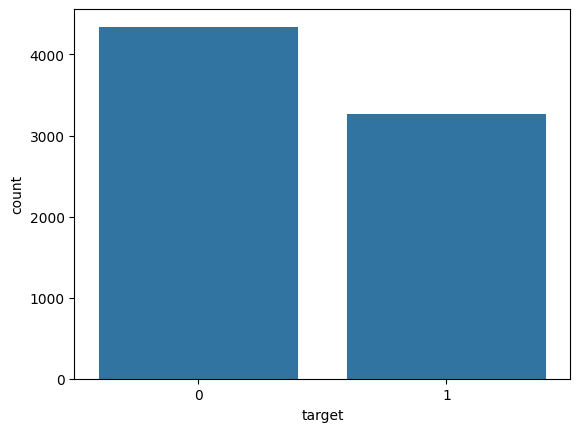

In [27]:
import seaborn as sns
#data[data['target'].isin([0, 1])]['target'].hist(bins=2)
sns.countplot(data=data[data['target'].isin([0, 1])], x='target')


We have a good balance of target values, this is really helpful for training the models

## Reducing number of columns - PCA

In [28]:
data = pd.read_csv('../data/data_preprocessed.csv')

In [29]:
from sklearn.decomposition import PCA

Having more than 600 colums is really hard to train models, that's why we decided to implement a PCA to reduce the columns by rending them completly independent and thus more efficient.
First we find the best number of components by utilyzing a gridsearchCv that utilize a specific score for pca models to find the best number that fits in this dataset

In [30]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {'n_components': [50, 100, 150, 200, 250, 300, 350]}

# Create the PCA object
pca = PCA()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pca, param_grid=param_grid)

# Fit the grid search to the data
grid_search.fit(data.drop('target', axis=1))

# Get the best parameter
best_n_components = grid_search.best_params_['n_components']

# Print the best parameter
print(f"The best n_components parameter is: {best_n_components}")


KeyboardInterrupt: 

In [ ]:
grid_search.best_score_

973.894461333801

In [ ]:
X_pca = grid_search.transform(data.drop('target', axis=1))

In [ ]:
X_pca = pd.DataFrame(X_pca, columns=[f'pca_{i}' for i in range(50)])

In [ ]:
X_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49
0,32.037382,0.063009,-0.012300,0.044218,-0.054182,-0.020441,0.001949,0.001794,0.018353,0.029558,...,0.005945,-0.000854,0.001082,0.010740,0.003802,0.005852,0.000915,0.009267,0.003213,-0.001920
1,63.037404,0.115065,0.049487,-0.048117,-0.071309,0.077298,0.002443,0.029772,-0.014563,0.019675,...,-0.000441,-0.013076,0.002054,0.002408,-0.002520,0.002527,0.000912,0.008203,0.003874,0.004499
2,-31.962595,-0.002840,0.042458,0.011977,-0.082679,0.036601,-0.028560,0.024012,0.004421,0.045597,...,-0.000240,-0.004392,0.004542,-0.005207,0.001750,0.013516,-0.006939,-0.000538,-0.002259,-0.001201
3,36.037390,0.112272,0.035276,-0.031507,-0.121250,0.011925,-0.032352,0.033230,-0.012090,0.042330,...,0.007567,-0.011042,0.005162,0.004702,0.008085,0.011330,0.000755,0.005691,0.006299,0.007691
4,13.037399,0.029200,0.071556,-0.036013,-0.101008,0.012711,0.023611,-0.001432,-0.010291,0.025855,...,0.005960,-0.009897,-0.003465,0.009238,0.005488,-0.002303,0.001212,0.000039,-0.002368,-0.002957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,18.037309,0.119904,0.012914,0.042214,0.003258,-0.002258,0.002188,-0.006380,-0.019091,-0.003836,...,-0.010084,0.003920,-0.005706,0.000786,-0.006225,-0.006412,-0.003973,0.010253,-0.002380,-0.005918
7609,-23.962641,0.029636,0.016747,-0.012877,-0.078394,0.020008,-0.022108,0.016364,-0.016639,-0.007889,...,-0.009060,-0.008730,-0.008065,0.010138,-0.000442,-0.002935,0.005200,-0.005442,-0.003399,-0.007185
7610,36.037343,0.100737,0.053306,-0.023713,-0.008691,-0.017624,0.029774,0.006579,0.031689,-0.006410,...,0.006637,0.009494,-0.000622,-0.001721,-0.003603,0.000875,-0.003202,0.004245,0.006617,0.002784
7611,-35.962590,-0.005081,0.000550,0.035588,0.014422,0.091393,0.060810,-0.018298,-0.012644,0.009015,...,0.002366,0.001357,-0.004933,-0.002832,0.000561,-0.003925,0.005845,-0.003502,-0.005749,0.006912


In [ ]:
df_pca = pd.concat([X_pca, data['target']], axis=1)

In [ ]:
df_pca.to_csv('../data/data_pca.csv', index=False)

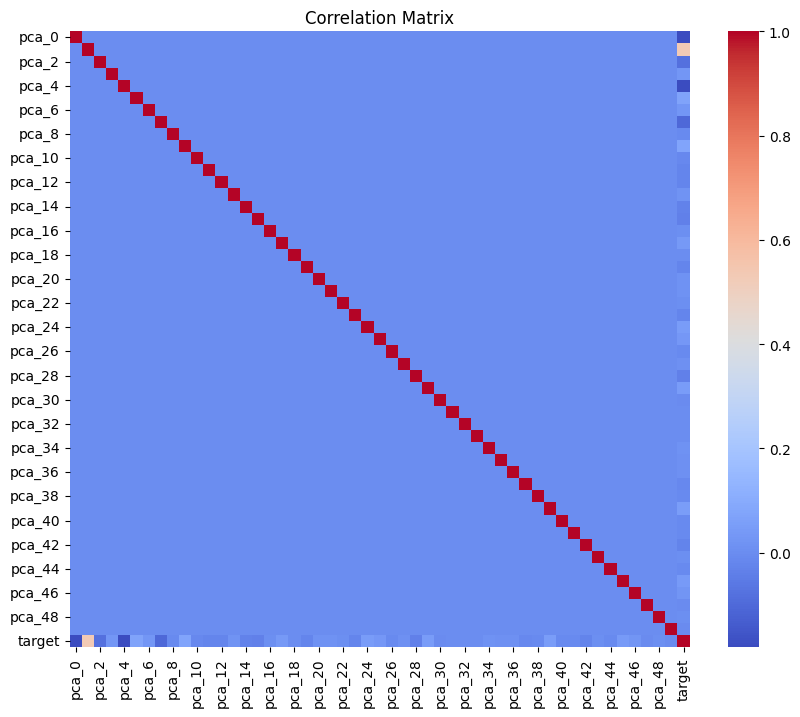

In [ ]:
import seaborn as sns
correlation_matrix = df_pca.corr()
correlation_matrix
import matplotlib.pyplot as plt

correlation_matrix = df_pca.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Created the new dataframe that has just the pca columns and the target value we can see the perceft independency between the column and their dependency with the target value. Thanks to the PCA it will be much faster to train the models and also more efficient.
Once the model will be trained and they will be ready to receive queries we will have to do the same process for the new query: 
1) embed the text of the tweet
2) generate the exact same dummies based on its keyword and the total ones
3) transform it using the pretrained pca model
4) finally give it to the model that tries to guess if it is a disaster or not